# Avaliação do impacto de fatores socioeconômicos na transmissão da COVID-19 no Rio Grande do Norte


## Importação de bibliotecas

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import calendar

!pip install unidecode
from unidecode import unidecode

!pip install -q xlrd

In [ ]:
from datetime import datetime, timedelta, date

def microsoft_to_iso8601(microsoft):
  try:
    base_date = datetime(1899, 12, 31)
    ret_date = base_date + timedelta(days=microsoft)
    return ret_date.isoformat()
  except:
    return np.nan

In [ ]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
folder = '/content/drive/My Drive/Projeto em Bioinformática - Patrícia e Júlia/'

## Limpeza dos Dados


O arquivo foi retirado do site da [SESAP/RN](http://www.saude.rn.gov.br/Conteudo.asp?TRAN=ITEM&TARG=223456&ACT=&PAGE=&PARM=&LBL=MAT%C9RIA) deve ser inserido na variável "input_file" para posterior identificação.

In [ ]:
# Arquivo epidemiológico da SESAP
# input_file = folder+'DOC000000000234175.xlsx'
input_file = folder+'Versao-unificada_27_11.xlsx'

# Carregar arquivo epidemiológico da SESAP
# data_epid = pd.read_csv(input_file,low_memory=False)
data_epid = pd.read_excel(input_file)

Trabalhar com a variável **data_epid_analises** para evitar a importação que é muito custosa


In [ ]:
# Realizar cópia do data_epid
data_epid_analises = data_epid.copy()

# Obter apenas os confirmados
data_epid_analises = data_epid_analises[data_epid_analises['NOVA_CLASS']==3]

# Exibir colunas do dataframe
data_epid_analises.keys().sort_values()

Index(['ANTIVIRAL', 'Bairro', 'CBO', 'CODIBGE', 'COMORBIDADES',
       'CondicoesPuerperaate45diasdoparto', 'DATA_ANTIVIRAL',
       'DATA_DIGITACAO_SIVEP', 'DETLAHE_COMORB_RISC', 'DT_ENTRADA',
       'DT_INTERNACAO', 'DT_SAIDA',
       'DT_SINT_CONSOLIDADAINICIOSINTOMAS_COLETA_NOT_OBITO',
       'DatadaColetadoTeste', 'DatadaNotificação', 'Datadeencerramento',
       'Datadoiníciodossintomas', 'Desc_sint', 'Diabetes', 'Dispneia',
       'Doençascardíacascrônicas',
       'Doençasrenaiscrônicasemestágioavançadograus34ou5',
       'Doençasrespiratóriascrônicasdescompensadas', 'DordeGarganta',
       'Dordecabeça', 'ETNIA', 'EstadodeResidência', 'EstadodoTeste',
       'Estrangeiro', 'EvoluçãoCaso', 'FAIXAETARIA', 'Febre',
       'Gestantedealtorisco', 'HAS', 'IDADE', 'Imunossupressão',
       'MunicipiodeResidancia', 'NOVA_CLASS', 'NOVA_RESUL', 'OBESIDADE',
       'Outros', 'Paisdeorigem',
       'Portadordedoençascromossômicasouestadodefragilidadeimunológic',
       'ProfissionaldeSegu

In [ ]:
# Padronizar a nomeação das colunas
data_epid_analises.columns = [unidecode(x).upper() for x in data_epid_analises]

# Selecionar colunas pertinentes às análises
data_epid_analises = data_epid_analises[['DATADOINICIODOSSINTOMAS',
                                         'DATADANOTIFICACAO',
                                         'DATADACOLETADOTESTE',
                                         'MUNICIPIODERESIDANCIA',
                                         'SEXO',
                                         'IDADE',
                                         'RACACOR',
                                         'NOVA_RESUL',
                                         'OBITO',
                                         'EVOLUCAOCASO',
                                         'CBO',
                                         'DT_INTERNACAO',
                                         'UTI',
                                         'ANTIVIRAL',
                                         'SINTOMAASSINTOMATICO']]

# Renomear as colunas
data_epid_analises.rename(columns = {
    'DATADOINICIODOSSINTOMAS':'DATA_SINTOMAS',
    'DATADANOTIFICACAO':'DATA_NOTIFICACAO',
    'DATADACOLETADOTESTE':'DATA_COLETA_TESTE',
    'MUNICIPIODERESIDANCIA':'MUNICIPIO',
    'SEXO':'GENERO',
    'RACACOR':'RACA_COR',
    'NOVA_RESUL':'RESULTADO_TESTE',
    'SINTOMAASSINTOMATICO':'ASSINTOMATICO',
    'EVOLUCAOCASO': 'EVOLUCAO'}, inplace = True)

In [ ]:
# Padronizar registros nas seguintes colunas: GENERO, RACA_COR e RESULTADO_TESTE
for column in ['GENERO', 'RACA_COR', 'RESULTADO_TESTE', 'MUNICIPIO','OBITO','UTI','ANTIVIRAL','ASSINTOMATICO','EVOLUCAO']:
  data_epid_analises[column].fillna('NAO INFORMADO', inplace=True)
  data_epid_analises[column].replace(' ', 'NAO INFORMADO', inplace=True)
  data_epid_analises[column] = [unidecode(x).upper() for x in data_epid_analises[column]]
  data_epid_analises[column].replace('NI', 'NAO INFORMADO', inplace=True)

# Definindo intervalos de faixa etária
def organizar_faixa(row):
    try:
      idade = int(row['IDADE'])
      if idade < 10:
        return "0 a 9"
      elif idade < 20:
        return "10 a 19"
      elif idade < 30:
        return "20 a 29"
      elif idade < 40:
        return "30 a 39"
      elif idade < 50:
        return "40 a 49"
      elif idade < 60:
        return "50 a 59"
      elif idade < 70:
        return "60 a 69"
      elif idade < 80:
        return "70 a 79"
      elif idade < 90:
        return "80 a 89"
      else:
        return "> 89"
    except:
      return np.nan

data_epid_analises["FAIXA_ETARIA_ATUALIZADA"] = data_epid_analises.apply(organizar_faixa, axis=1)

# Exibir dataframe
data_epid_analises.head()

,DATA_SINTOMAS,DATA_NOTIFICACAO,DATA_COLETA_TESTE,MUNICIPIO,GENERO,IDADE,RACA_COR,RESULTADO_TESTE,OBITO,EVOLUCAO,CBO,DT_INTERNACAO,UTI,ANTIVIRAL,ASSINTOMATICO,FAIXA_ETARIA_ATUALIZADA
630,43902.0,44006.0,43902,NATAL,MASCULINO,22.475,NAO INFORMADO,POSITIVO,NAO INFORMADO,NAO INFORMADO,NaN,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,20 a 29
641,43902.0,44127.0,44095,SAO GONCALO DO AMARANTE,FEMININO,37.1526,NAO INFORMADO,POSITIVO,NAO INFORMADO,NAO INFORMADO,NaN,NaN,NAO INFORMADO,NAO INFORMADO,NAO,30 a 39
648,43903.0,43958.0,43917,MOSSORO,MASCULINO,65.2868,NAO INFORMADO,POSITIVO,NAO INFORMADO,NAO INFORMADO,NaN,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,60 a 69
649,43903.0,43958.0,43944,MOSSORO,FEMININO,31.1485,BRANCA,POSITIVO,NAO INFORMADO,NAO INFORMADO,3222 - Técnico ou Auxiliar em Enfermagem,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,30 a 39
651,NaN,43961.0,43942,MOSSORO,FEMININO,53.1417,PARDA,POSITIVO,NAO INFORMADO,NAO INFORMADO,3222 - Técnico ou Auxiliar em Enfermagem,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,50 a 59


### Normalização dos Resultados

In [ ]:
# Definindo coluna com a soma de positivos
data_epid_analises['RESULTADO_POSITIVO'] = data_epid_analises['RESULTADO_TESTE'].str.contains('POSITIVO', na = False)

# Definindo coluna com a soma de obitos
data_epid_analises['OBITO_POSITIVO'] = data_epid_analises['OBITO'].str.contains('OBITO', na = False)

# Definindo coluna com a soma de internações
data_epid_analises['FOI_INTERNADO'] =  data_epid_analises['DT_INTERNACAO'].notna()

# Definindo coluna com a soma de internações uti
data_epid_analises['FOI_UTI'] =  data_epid_analises['UTI'].str.contains('SIM', na = False)

# Definindo se tomou ou não antiviral
data_epid_analises['FOI_ANTIVIRAL'] =  data_epid_analises['ANTIVIRAL'].str.contains('NAO', na = False)

# Definindo se foi assintomático
data_epid_analises['FOI_ASSINTOMATICO'] =  data_epid_analises['ASSINTOMATICO'].str.contains('SIM', na = False)

# Total de casos confirmados
data_epid_analises['OBITO_POSITIVO'].sum()

2688

### Normalização das datas

In [ ]:
# Converter do formato da Microsoft Timestamp
data_epid_analises["DATA_SINTOMAS_ATUALIZADA"] = data_epid_analises['DATA_SINTOMAS'].apply(microsoft_to_iso8601)

# Definindo apenas mês e ano
data_epid_analises['DATA_MES'] = pd.to_datetime(data_epid_analises['DATA_SINTOMAS_ATUALIZADA'])
data_epid_analises['DATA_MES'] = data_epid_analises['DATA_MES'].dt.strftime('%m/%y')

# Definindo mês, ano e dia
data_epid_analises['DATA_MES_DIA'] = pd.to_datetime(data_epid_analises['DATA_SINTOMAS_ATUALIZADA'])
data_epid_analises['DATA_MES_DIA'] = data_epid_analises['DATA_MES_DIA'].dt.strftime('%d/%m/%y')

## Análise dos Dados


### Visão Geral

In [ ]:
# Descrição das colunas do dataframe
data_epid_analises.describe(include= 'all').head(4)

,DATA_SINTOMAS,DATA_NOTIFICACAO,DATA_COLETA_TESTE,MUNICIPIO,GENERO,IDADE,RACA_COR,RESULTADO_TESTE,OBITO,EVOLUCAO,CBO,DT_INTERNACAO,UTI,ANTIVIRAL,ASSINTOMATICO,FAIXA_ETARIA_ATUALIZADA,RESULTADO_POSITIVO,OBITO_POSITIVO,FOI_INTERNADO,FOI_UTI,FOI_ANTIVIRAL,FOI_ASSINTOMATICO,DATA_SINTOMAS_ATUALIZADA,DATA_MES,DATA_MES_DIA
count,76649.0,89113.0,86289,93048,93048,93048,93048,93048,93048,93048,9701,4527.0,93048,93048,93048,92919,93048,93048,93048,93048,93048,93048,76649,76649,76649
unique,NaN,NaN,282,338,3,25621,6,4,2,12,427,NaN,7,7,3,10,2,2,2,2,2,2,305,11,305
top,NaN,NaN,NI,NATAL,FEMININO,NI,PARDA,POSITIVO,NAO INFORMADO,NAO INFORMADO,3222 - Técnico ou Auxiliar em Enfermagem,NaN,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,30 a 39,True,False,False,False,True,False,2020-06-02T00:00:00,06/20,02/06/20
freq,NaN,NaN,4116,28872,49452,129,33314,86216,90360,87073,1852,NaN,88581,89863,68927,23540,86216,90360,88521,91981,91113,87127,1241,20637,1241


In [ ]:
# Total de Objetos
data_epid_analises.shape

(93048, 25)

### Faixa Etária

#### Total de casos confirmados

In [ ]:
# Separar dados por faixa etária
table_fx_etaria = data_epid_analises.pivot_table(index=["FAIXA_ETARIA_ATUALIZADA"], values = ["RESULTADO_POSITIVO", "OBITO_POSITIVO"], aggfunc=np.sum)
table_fx_etaria = table_fx_etaria.reset_index()
table_fx_etaria['FATALIDADE'] = table_fx_etaria['OBITO_POSITIVO']/table_fx_etaria['RESULTADO_POSITIVO']*100
table_fx_etaria

,FAIXA_ETARIA_ATUALIZADA,OBITO_POSITIVO,RESULTADO_POSITIVO,FATALIDADE
0,0 a 9,11,1419,0.775194
1,10 a 19,9,3742,0.240513
2,20 a 29,42,14731,0.285113
3,30 a 39,100,22298,0.448471
4,40 a 49,183,17531,1.043865
5,50 a 59,363,13069,2.777565
6,60 a 69,477,7149,6.672262
7,70 a 79,664,3904,17.008197
8,80 a 89,559,1817,30.764997
9,> 89,215,479,44.885177


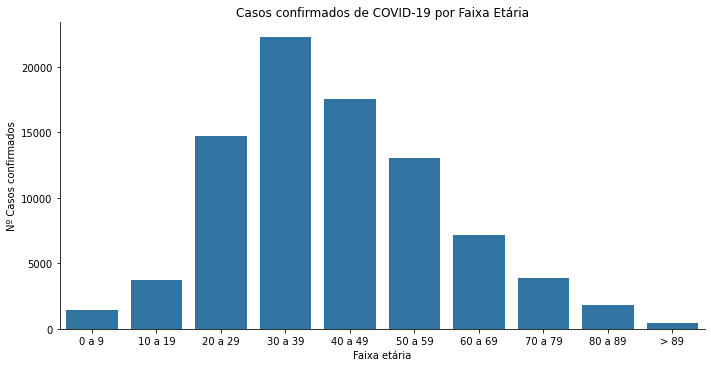

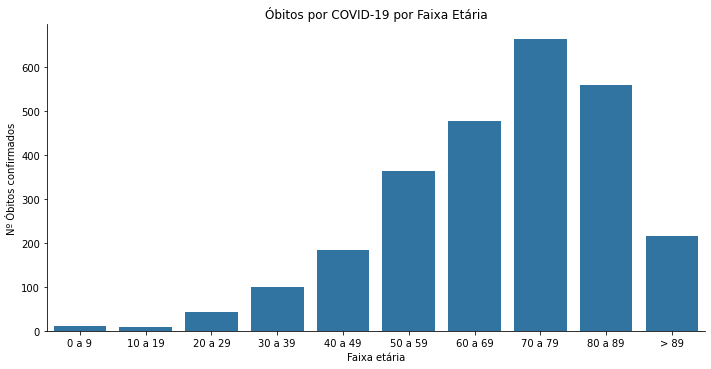

In [ ]:
# Separar dados por faixa etária
table_fx_etaria = data_epid_analises.pivot_table(index=["FAIXA_ETARIA_ATUALIZADA"], values = ["RESULTADO_POSITIVO", "OBITO_POSITIVO"], aggfunc=np.sum)
table_fx_etaria = table_fx_etaria.reset_index()

# Criar e exibir gráfico
fx_etaria_positivo = sns.FacetGrid(table_fx_etaria, height=5, aspect=2)
fx_etaria_positivo.map(sns.barplot, "FAIXA_ETARIA_ATUALIZADA","RESULTADO_POSITIVO", order = table_fx_etaria.sort_values("FAIXA_ETARIA_ATUALIZADA").FAIXA_ETARIA_ATUALIZADA)

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID-19 por Faixa Etária no Rio Grande do Norte")
plt.title("Casos confirmados de COVID-19 por Faixa Etária")

plt.ylabel("Nº Casos confirmados")
plt.xlabel("Faixa etária")
plt.show(fx_etaria_positivo)

# Separar dados por faixa etária
table_fx_etaria = data_epid_analises.pivot_table(index=["FAIXA_ETARIA_ATUALIZADA"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_fx_etaria = table_fx_etaria.reset_index()

# Criar e exibir gráfico
fx_etaria_positivo = sns.FacetGrid(table_fx_etaria, height=5, aspect=2)
fx_etaria_positivo.map(sns.barplot, "FAIXA_ETARIA_ATUALIZADA","OBITO_POSITIVO", order = table_fx_etaria.sort_values("FAIXA_ETARIA_ATUALIZADA").FAIXA_ETARIA_ATUALIZADA)

# Definindo titulos e legendas
plt.title("Óbitos por COVID-19 por Faixa Etária no Rio Grande do Norte")
plt.title("Óbitos por COVID-19 por Faixa Etária")

plt.ylabel("Nº Óbitos confirmados")
plt.xlabel("Faixa etária")
plt.show(fx_etaria_positivo)

#### Casos confirmados ao longo do tempo

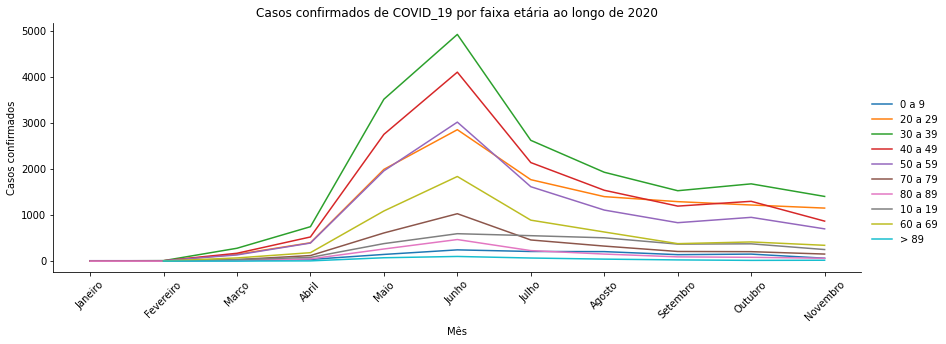

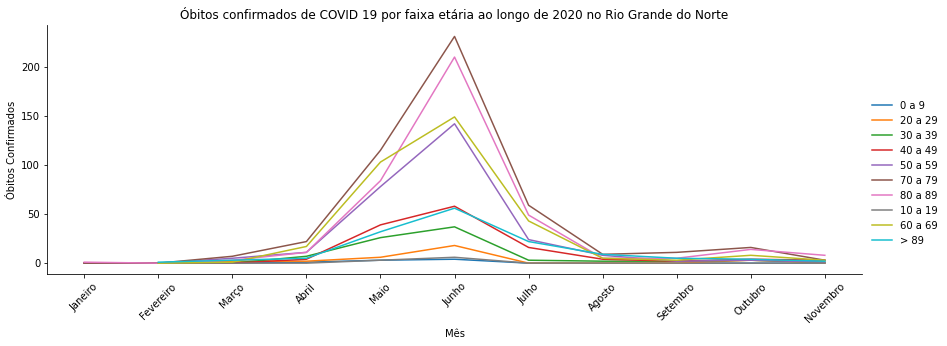

In [ ]:
# Separar dados por Faixa Etária e Data da coleta de informação'
table_fx_etaria_periodo = data_epid_analises.pivot_table(index=["FAIXA_ETARIA_ATUALIZADA", "DATA_MES"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_fx_etaria_periodo = table_fx_etaria_periodo.reset_index()
table_fx_etaria_periodo = table_fx_etaria_periodo.sort_values(["DATA_MES", "FAIXA_ETARIA_ATUALIZADA"])

# Filtragem
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '09/19']
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '06/19']
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '05/87']
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '11/19']

# Criar e Exibir plot
fx_etaria_positivo_periodo = sns.FacetGrid(table_fx_etaria_periodo,  height=4, aspect=3)
fx_etaria_positivo_periodo.map_dataframe(sns.lineplot, x="DATA_MES", y="RESULTADO_POSITIVO", hue="FAIXA_ETARIA_ATUALIZADA")
fx_etaria_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID_19 por faixa etária ao longo de 2020")
plt.xlabel("Mês")
plt.ylabel("Casos confirmados")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), ('Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro'), rotation=45)
plt.show(fx_etaria_positivo_periodo)

# Separar dados por Faixa Etária e Data da coleta de informação'
table_fx_etaria_periodo = data_epid_analises.pivot_table(index=["FAIXA_ETARIA_ATUALIZADA", "DATA_MES"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_fx_etaria_periodo = table_fx_etaria_periodo.reset_index()
table_fx_etaria_periodo = table_fx_etaria_periodo.sort_values(["DATA_MES", "FAIXA_ETARIA_ATUALIZADA"])

# Filtragem
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '09/19']
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '06/19']
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '05/87']
table_fx_etaria_periodo = table_fx_etaria_periodo[table_fx_etaria_periodo['DATA_MES']!= '11/19']

# Criar e Exibir plot
fx_etaria_positivo_periodo = sns.FacetGrid(table_fx_etaria_periodo,  height=4, aspect=3)
fx_etaria_positivo_periodo.map_dataframe(sns.lineplot, x="DATA_MES", y="OBITO_POSITIVO", hue="FAIXA_ETARIA_ATUALIZADA")
fx_etaria_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID 19 por faixa etária ao longo de 2020 no Rio Grande do Norte")
plt.xlabel("Mês")
plt.ylabel("Óbitos Confirmados")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), ('Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro'), rotation=45)
plt.show(fx_etaria_positivo_periodo)

### Gênero

#### Total de casos confirmados

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



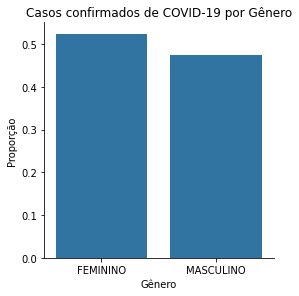

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



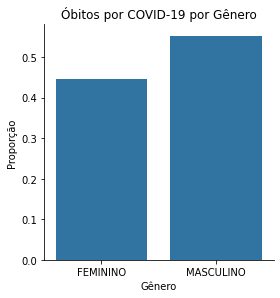

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



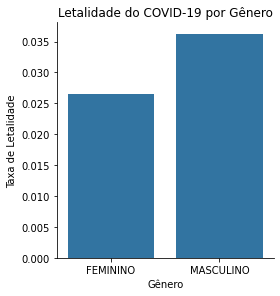

In [ ]:
# Separar dados por gênero
table_genero = data_epid_analises.pivot_table(index=['GENERO'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_genero = table_genero.reset_index()

# Filtragem
table_genero = table_genero[table_genero['GENERO']!= 'NAO INFORMADO']

# Proporção
table_genero['PROPORCAO'] = table_genero['RESULTADO_POSITIVO']/table_genero['RESULTADO_POSITIVO'].sum()

# Criar e exibir gráfico
genero_positivo = sns.FacetGrid(table_genero, height=4, aspect=1)
genero_positivo.map(sns.barplot,"GENERO","PROPORCAO")

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID 19 por gênero no Rio Grande do Norte")
plt.title("Casos confirmados de COVID-19 por Gênero")

plt.xlabel("Gênero")
plt.ylabel("Proporção")
plt.show(genero_positivo)

# Separar dados por genero
table_genero = data_epid_analises.pivot_table(index=['GENERO'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_genero = table_genero.reset_index()

# Filtragem
table_genero = table_genero[table_genero['GENERO']!= 'NAO INFORMADO']

# Proporção
table_genero['PROPORCAO'] = table_genero['OBITO_POSITIVO']/table_genero['OBITO_POSITIVO'].sum()

# Criar e exibir gráfico
genero_positivo = sns.FacetGrid(table_genero, height=4, aspect=1)
genero_positivo.map(sns.barplot,"GENERO","PROPORCAO")

# Definindo titulos e legendas
plt.title("Óbitos por COVID 19 por gênero no Rio Grande do Norte")
plt.title("Óbitos por COVID-19 por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Proporção")
plt.show(genero_positivo)

# Separar dados por faixa etária
table_genero_fatalidade = data_epid_analises.pivot_table(index=["GENERO"], values = ["RESULTADO_POSITIVO", "OBITO_POSITIVO"], aggfunc=np.sum)
table_genero_fatalidade = table_genero_fatalidade.reset_index()
table_genero_fatalidade['FATALIDADE'] = table_genero_fatalidade['OBITO_POSITIVO']/table_genero_fatalidade['RESULTADO_POSITIVO']
table_genero_fatalidade = table_genero_fatalidade[['GENERO','FATALIDADE']]

# Filtragem
table_genero_fatalidade = table_genero_fatalidade[table_genero_fatalidade['GENERO']!= 'NAO INFORMADO']

# Criar e exibir gráfico
genero_positivo = sns.FacetGrid(table_genero_fatalidade, height=4, aspect=1)
genero_positivo.map(sns.barplot,"GENERO","FATALIDADE")

# Definindo titulos e legendas
plt.title("Letalidade do COVID-19 por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Taxa de Letalidade")
plt.show(genero_positivo)


#### Casos confirmados ao longo do tempo

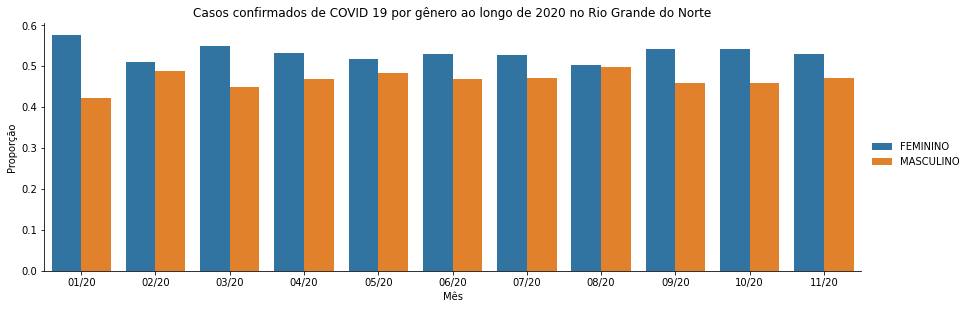

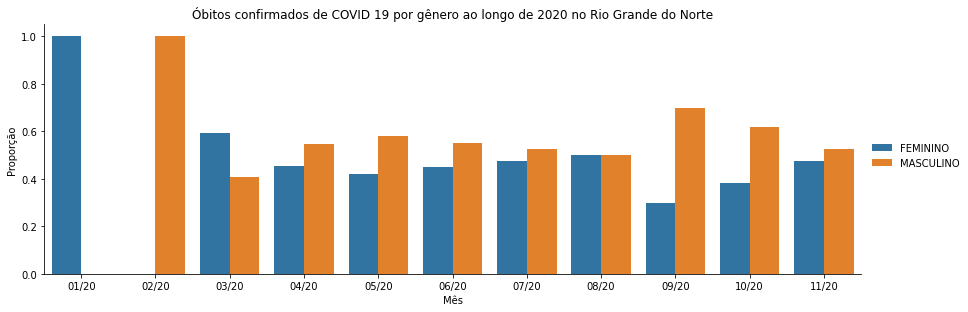

In [ ]:
# Separar dados por gênero e Data da coleta de informação
table_genero_periodo = data_epid_analises.pivot_table(index=["GENERO", "DATA_MES"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_genero_periodo = table_genero_periodo.reset_index()

# Filtragem
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '09/19']
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '05/87']
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '06/19']
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '11/19']
quant_casos = pd.concat([table_genero_periodo.groupby('DATA_MES')['RESULTADO_POSITIVO'].agg('sum').reset_index()]*2).reset_index(drop=True)
table_genero_periodo = table_genero_periodo[table_genero_periodo['GENERO']!= 'NAO INFORMADO']

# Proporção
table_genero_periodo['PROPORCAO'] = table_genero_periodo['RESULTADO_POSITIVO']/quant_casos['RESULTADO_POSITIVO']

# Criar e exibir gráfico
genero_positivo_periodo = sns.FacetGrid(table_genero_periodo,  height=4, aspect=3)
genero_positivo_periodo.map_dataframe(sns.barplot, x="DATA_MES", y='PROPORCAO', hue='GENERO',  palette='tab10')
genero_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID 19 por gênero ao longo de 2020 no Rio Grande do Norte")
plt.xlabel("Mês")
plt.ylabel("Proporção")
plt.show(genero_positivo_periodo)

# Separar dados por gênero e Data da coleta de informação
table_genero_periodo = data_epid_analises.pivot_table(index=["GENERO", "DATA_MES"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_genero_periodo = table_genero_periodo.reset_index()

# Filtragem
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '09/19']
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '05/87']
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '06/19']
table_genero_periodo = table_genero_periodo[table_genero_periodo['DATA_MES']!= '11/19']
quant_obitos = pd.concat([table_genero_periodo.groupby('DATA_MES')['OBITO_POSITIVO'].agg('sum').reset_index()]*2).reset_index(drop=True)
table_genero_periodo = table_genero_periodo[table_genero_periodo['GENERO']!= 'NAO INFORMADO']

# Proporção
table_genero_periodo['PROPORCAO'] = table_genero_periodo['OBITO_POSITIVO']/quant_obitos['OBITO_POSITIVO']

# Criar e exibir gráfico
genero_positivo_periodo = sns.FacetGrid(table_genero_periodo,  height=4, aspect=3)
genero_positivo_periodo.map_dataframe(sns.barplot, x="DATA_MES", y='PROPORCAO', hue='GENERO',  palette='tab10')
genero_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID 19 por gênero ao longo de 2020 no Rio Grande do Norte")
plt.xlabel("Mês")
plt.ylabel("Proporção")
plt.show(genero_positivo_periodo)

#### Contaminação por Gênero e Faixa etária

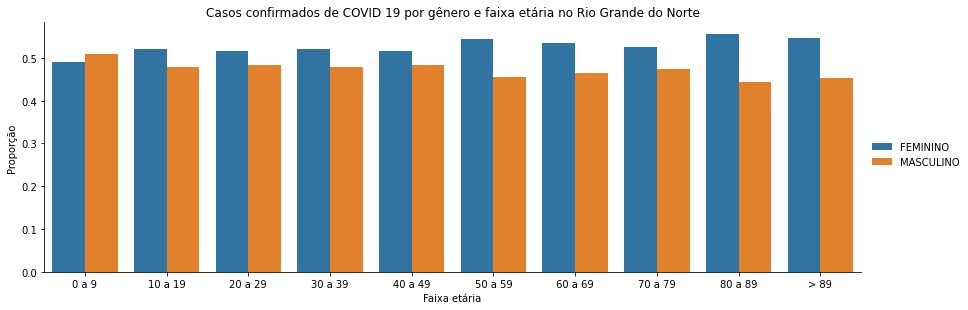

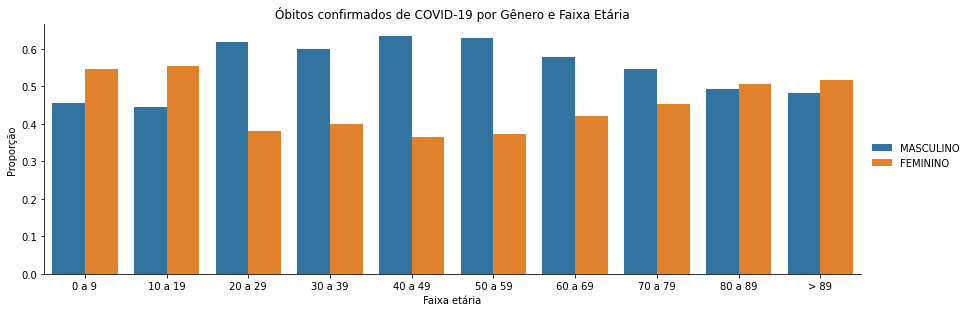

In [ ]:
# Separar dados por gênero e idade
table_genero_idade = data_epid_analises.pivot_table(index=['GENERO','FAIXA_ETARIA_ATUALIZADA'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_genero_idade = table_genero_idade.reset_index()

# Filtragem
quant_casos = pd.concat([table_genero_idade.groupby('FAIXA_ETARIA_ATUALIZADA')['RESULTADO_POSITIVO'].agg('sum').reset_index()]*2).reset_index(drop=True)
table_genero_idade = table_genero_idade[table_genero_idade['GENERO']!= 'NAO INFORMADO']

# Proporção
table_genero_idade['PROPORCAO'] = table_genero_idade['RESULTADO_POSITIVO']/quant_casos['RESULTADO_POSITIVO']

# Criar e exibir gráfico
genero_idade = sns.FacetGrid(table_genero_idade,  height=4, aspect=3)
genero_idade.map_dataframe(sns.barplot, x="FAIXA_ETARIA_ATUALIZADA", y='PROPORCAO', hue='GENERO', palette='tab10')
genero_idade.add_legend()

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID 19 por gênero e faixa etária no Rio Grande do Norte")
plt.xlabel("Faixa etária")
plt.ylabel("Proporção")
plt.show(genero_idade)

# Separar dados por genero e idade
table_genero_idade = data_epid_analises.pivot_table(index=['GENERO','FAIXA_ETARIA_ATUALIZADA'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_genero_idade = table_genero_idade.reset_index()

# Filtragem
quant_obitos = pd.concat([table_genero_idade.groupby('FAIXA_ETARIA_ATUALIZADA')['OBITO_POSITIVO'].agg('sum').reset_index()]*2).reset_index(drop=True)
table_genero_idade = table_genero_idade[table_genero_idade['GENERO']!= 'NAO INFORMADO']

# Proporção
table_genero_idade['PROPORCAO'] = table_genero_idade['OBITO_POSITIVO']/quant_obitos['OBITO_POSITIVO']
table_genero_idade = table_genero_idade.sort_values("GENERO", ascending=False)
table_genero_idade = table_genero_idade.sort_values("FAIXA_ETARIA_ATUALIZADA")


# Criar e exibir gráfico
genero_idade = sns.FacetGrid(table_genero_idade,  height=4, aspect=3)
genero_idade.map_dataframe(sns.barplot, x="FAIXA_ETARIA_ATUALIZADA", y='PROPORCAO', hue='GENERO', palette='tab10')
genero_idade.add_legend()

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID 19 por gênero e faixa etária no Rio Grande do Norte")
plt.title("Óbitos confirmados de COVID-19 por Gênero e Faixa Etária")

plt.xlabel("Faixa etária")
plt.ylabel("Proporção")
plt.show(genero_idade)

### Raça-Cor

In [ ]:
# Exibir tipos raça
data_epid_analises['RACA_COR'].unique()

array(['NAO INFORMADO', 'BRANCA', 'PARDA', 'AMARELA', 'PRETA', 'INDIGENA'],
      dtype=object)

##### Total de Casos Confirmados


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



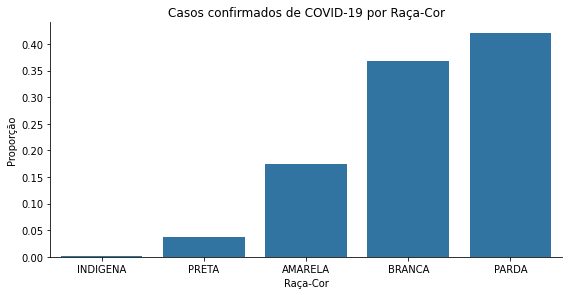

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



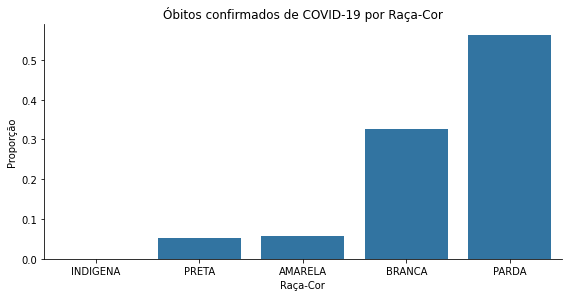

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



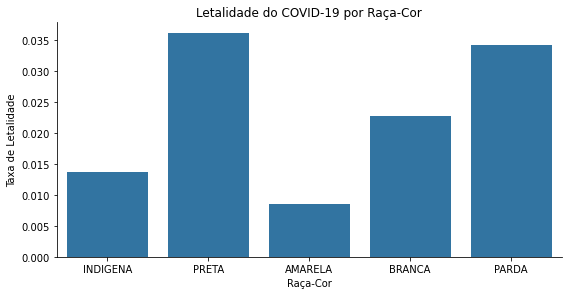

In [ ]:
# Separar dados por raça-cor
table_raca_cor = data_epid_analises.pivot_table(index=["RACA_COR"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_raca_cor = table_raca_cor.reset_index()

# Filtragem
table_raca_cor = table_raca_cor.sort_values("RESULTADO_POSITIVO")
table_raca_cor = table_raca_cor[table_raca_cor['RACA_COR']!= 'NAO INFORMADO']

# Proporção
table_raca_cor['PROPORCAO'] = table_raca_cor['RESULTADO_POSITIVO']/table_raca_cor['RESULTADO_POSITIVO'].sum()

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_cor, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "PROPORCAO")

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.title("Casos confirmados de COVID-19 por Raça-Cor")

plt.ylabel("Proporção")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

# Separar dados por raça-cor
table_raca_cor = data_epid_analises.pivot_table(index=["RACA_COR"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_cor = table_raca_cor.reset_index()

# Filtragem
table_raca_cor = table_raca_cor.sort_values("OBITO_POSITIVO")
table_raca_cor = table_raca_cor[table_raca_cor['RACA_COR']!= 'NAO INFORMADO']

# Proporção
table_raca_cor['PROPORCAO'] = table_raca_cor['OBITO_POSITIVO']/table_raca_cor['OBITO_POSITIVO'].sum()

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_cor, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "PROPORCAO")

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID-19 por Raça-Cor no Rio Grande do Norte")
plt.title("Óbitos confirmados de COVID-19 por Raça-Cor")

plt.ylabel("Proporção")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

# Separar dados por raça-cor
table_raca_fatalidade = data_epid_analises.pivot_table(index=["RACA_COR"], values = ["RESULTADO_POSITIVO", "OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_fatalidade = table_raca_fatalidade.reset_index()
table_raca_fatalidade = table_raca_fatalidade.sort_values("RESULTADO_POSITIVO")
table_raca_fatalidade['FATALIDADE'] = table_raca_fatalidade['OBITO_POSITIVO']/table_raca_fatalidade['RESULTADO_POSITIVO']
table_raca_fatalidade = table_raca_fatalidade[['RACA_COR', 'FATALIDADE']]

# Filtragem
table_raca_fatalidade = table_raca_fatalidade[table_raca_fatalidade['RACA_COR']!= 'NAO INFORMADO']

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_fatalidade, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "FATALIDADE")

# Definindo titulos e legendas
plt.title("Fatalidade de COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.title("Letalidade do COVID-19 por Raça-Cor")

plt.ylabel("Taxa de Letalidade")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

Total de Casos ao longo do Tempo

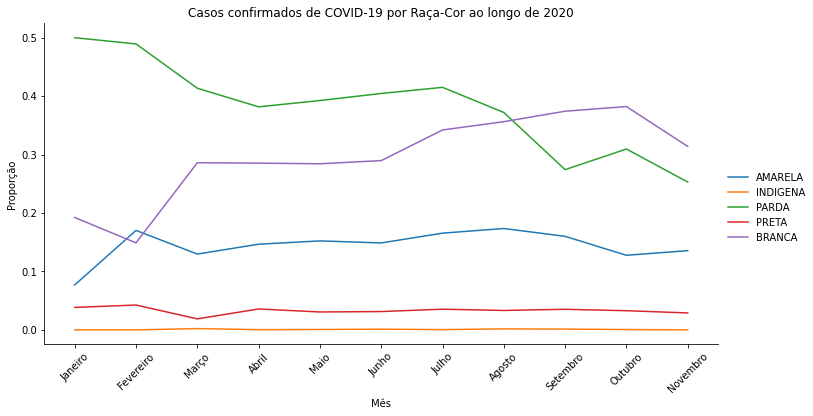

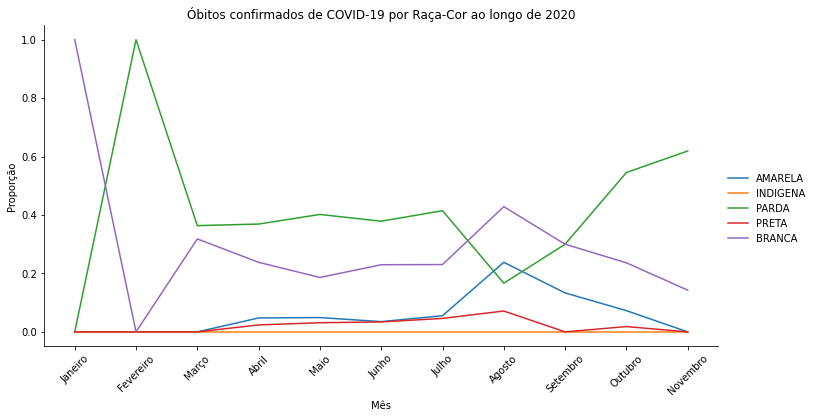

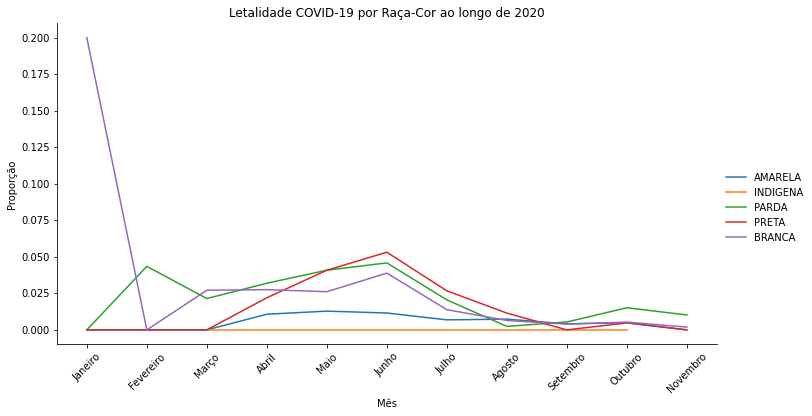

In [ ]:
# Separar dados por Raça-Cor e Data da coleta de informação'
table_raca_cor_periodo = data_epid_analises.pivot_table(index=["RACA_COR", "DATA_MES"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_raca_cor_periodo = table_raca_cor_periodo.reset_index()
table_raca_cor_periodo = table_raca_cor_periodo.append([pd.Series(['INDIGENA', '01/20', 0], index=table_raca_cor_periodo.columns),
                                                        pd.Series(['INDIGENA', '02/20', 0], index=table_raca_cor_periodo.columns),
                                                        pd.Series(['INDIGENA', '11/20', 0], index=table_raca_cor_periodo.columns)], ignore_index=True)
table_raca_cor_periodo = table_raca_cor_periodo.sort_values(["RACA_COR","DATA_MES"])

# Filtragem
quant_casos = pd.concat([table_raca_cor_periodo.groupby('DATA_MES')['RESULTADO_POSITIVO'].agg('sum').reset_index()]*5).reset_index(drop=True)
table_raca_cor_periodo = table_raca_cor_periodo[table_raca_cor_periodo['RACA_COR']!= 'NAO INFORMADO']
table_raca_cor_periodo = table_raca_cor_periodo.reset_index()

# Proporção
table_raca_cor_periodo['PROPORCAO'] = table_raca_cor_periodo['RESULTADO_POSITIVO']/quant_casos['RESULTADO_POSITIVO']
table_raca_cor_periodo = table_raca_cor_periodo.sort_values(["DATA_MES"])

# Criar e Exibir plot
raca_cor_positivo_periodo = sns.FacetGrid(table_raca_cor_periodo,  height=5, aspect=2)
raca_cor_positivo_periodo.map_dataframe(sns.lineplot, x="DATA_MES", y="PROPORCAO", hue="RACA_COR")
raca_cor_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID-19 por Raça-Cor ao longo de 2020")
plt.xlabel("Mês")
plt.ylabel("Proporção")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), ('Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro'), rotation=45)
plt.show(raca_cor_positivo_periodo)

# Separar dados por Raça-Cor e Data da coleta de informação
table_raca_cor_periodo = data_epid_analises.pivot_table(index=["RACA_COR", "DATA_MES"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_cor_periodo = table_raca_cor_periodo.reset_index()
table_raca_cor_periodo = table_raca_cor_periodo.append([pd.Series(['INDIGENA', '01/20', 0], index=table_raca_cor_periodo.columns),
                                                        pd.Series(['INDIGENA', '02/20', 0], index=table_raca_cor_periodo.columns),
                                                        pd.Series(['INDIGENA', '11/20', 0], index=table_raca_cor_periodo.columns)], ignore_index=True)
table_raca_cor_periodo = table_raca_cor_periodo.sort_values(["RACA_COR","DATA_MES"])

# Filtragem
quant_casos = pd.concat([table_raca_cor_periodo.groupby('DATA_MES')['OBITO_POSITIVO'].agg('sum').reset_index()]*5).reset_index(drop=True)
table_raca_cor_periodo = table_raca_cor_periodo[table_raca_cor_periodo['RACA_COR']!= 'NAO INFORMADO']
table_raca_cor_periodo = table_raca_cor_periodo.reset_index()

# Proporção
table_raca_cor_periodo['PROPORCAO'] = table_raca_cor_periodo['OBITO_POSITIVO']/quant_casos['OBITO_POSITIVO']
table_raca_cor_periodo = table_raca_cor_periodo.sort_values(["DATA_MES"])

# Criar e Exibir plot
raca_cor_positivo_periodo = sns.FacetGrid(table_raca_cor_periodo,  height=5, aspect=2)
raca_cor_positivo_periodo.map_dataframe(sns.lineplot, x="DATA_MES", y="PROPORCAO", hue="RACA_COR")
raca_cor_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID-19 por Raça-Cor ao longo de 2020")
plt.xlabel("Mês")
plt.ylabel("Proporção")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), ('Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro'), rotation=45)
plt.show(raca_cor_positivo_periodo)

# Separar dados por Raça-Cor e Data da coleta de informação
table_raca_fatalidade = data_epid_analises.pivot_table(index=["RACA_COR","DATA_MES"], values = ["RESULTADO_POSITIVO", "OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_fatalidade = table_raca_fatalidade.reset_index()
table_raca_fatalidade = table_raca_fatalidade.append([pd.Series(['INDIGENA', '01/20', 0, 0], index=table_raca_fatalidade.columns),
                                                        pd.Series(['INDIGENA', '02/20', 0, 0], index=table_raca_fatalidade.columns),
                                                        pd.Series(['INDIGENA', '11/20', 0, 0], index=table_raca_fatalidade.columns)], ignore_index=True)
table_raca_fatalidade = table_raca_fatalidade.sort_values(["RACA_COR","DATA_MES"])
table_raca_fatalidade['FATALIDADE'] = table_raca_fatalidade['OBITO_POSITIVO']/table_raca_fatalidade['RESULTADO_POSITIVO']

# Filtragem
table_raca_fatalidade = table_raca_fatalidade[table_raca_fatalidade['RACA_COR']!= 'NAO INFORMADO']
table_raca_fatalidade = table_raca_fatalidade.sort_values(["DATA_MES"])

# Criar e Exibir plot
raca_cor_positivo_periodo = sns.FacetGrid(table_raca_fatalidade,  height=5, aspect=2)
raca_cor_positivo_periodo.map_dataframe(sns.lineplot, x="DATA_MES", y="FATALIDADE", hue="RACA_COR")
raca_cor_positivo_periodo.add_legend()

# Definindo titulos e legendas
plt.title("Letalidade COVID-19 por Raça-Cor ao longo de 2020")
plt.xlabel("Mês")
plt.ylabel("Proporção")
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), ('Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro'), rotation=45)
plt.show(raca_cor_positivo_periodo)


Raça e Gênero

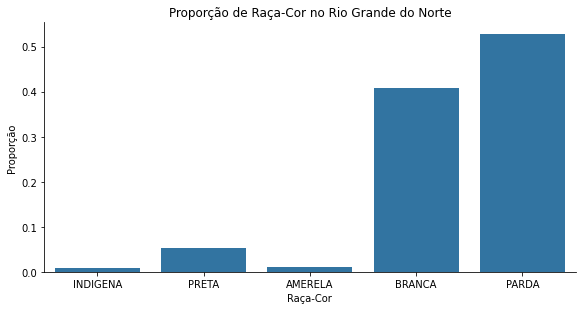

In [ ]:
colunas = ['RAÇA','PORCENTAGEM']
data =np.array([
                ['INDIGENA', 0.009],
                ['PRETA', 0.0523],
                ['AMERELA', 0.0107],
                ['BRANCA', 0.4084],
                ['PARDA', 0.5275]
                ])
raca_IBGE = pd.DataFrame(data, columns= colunas)
raca_IBGE['PORCENTAGEM'] = raca_IBGE['PORCENTAGEM'].astype('float')

raca_positivo = sns.FacetGrid(raca_IBGE,  height=4, aspect=2)
raca_positivo.map_dataframe(sns.barplot, x="RAÇA", y="PORCENTAGEM")
plt.title("Proporção de Raça-Cor no Rio Grande do Norte")
plt.xlabel("Raça-Cor")
plt.ylabel("Proporção")
plt.show()

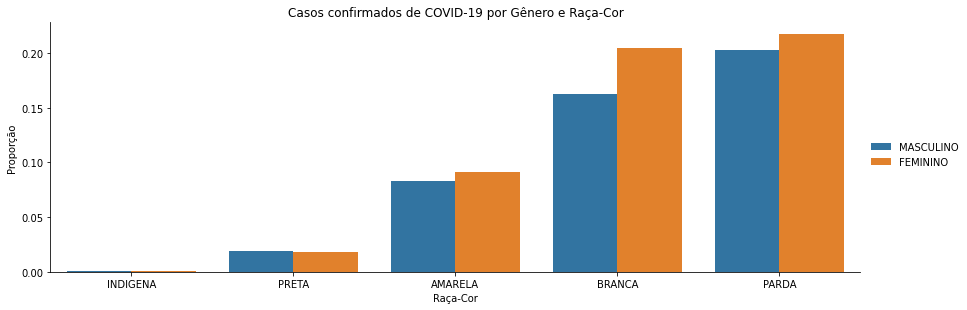

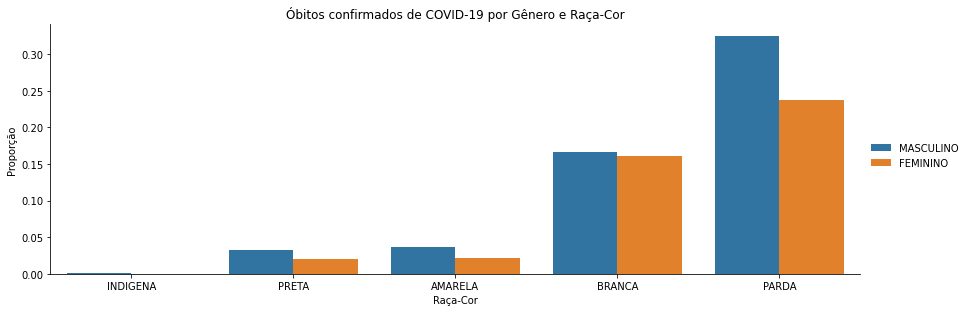

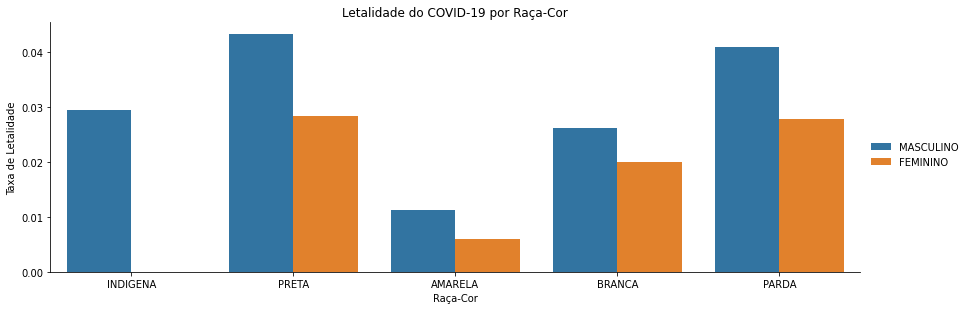

In [ ]:
# Separar dados por raça-cor e gênero
table_raca_genero = data_epid_analises.pivot_table(index=["RACA_COR","GENERO"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_raca_genero = table_raca_genero.reset_index()

# Filtragem
table_raca_genero = table_raca_genero[table_raca_genero['GENERO']!= 'NAO INFORMADO']
table_raca_genero = table_raca_genero[table_raca_genero['RACA_COR']!= 'NAO INFORMADO']
table_raca_genero = table_raca_genero.sort_values(["RESULTADO_POSITIVO"])

# Proporcao
table_raca_genero['PROPORCAO'] = table_raca_genero['RESULTADO_POSITIVO']/table_raca_genero['RESULTADO_POSITIVO'].sum()
table_raca_genero = table_raca_genero.sort_values("GENERO", ascending=False)

# Criar e exibir gráfico
raca_genero_positivo = sns.FacetGrid(table_raca_genero,  height=4, aspect=3)
raca_genero_positivo.map_dataframe(sns.barplot, x="RACA_COR", y='PROPORCAO', hue='GENERO', palette='tab10')
raca_genero_positivo.add_legend()

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID-19 por Gênero, para cada raça-cor, no Rio Grande do Norte")
plt.title("Casos confirmados de COVID-19 por Gênero e Raça-Cor")

plt.xlabel("Raça-Cor")
plt.ylabel("Proporção")
plt.show(raca_genero_positivo)

# Separar dados por raça-cor e gênero
table_raca_genero = data_epid_analises.pivot_table(index=["RACA_COR","GENERO"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_genero = table_raca_genero.reset_index()


# Filtragem
table_raca_genero = table_raca_genero[table_raca_genero['GENERO']!= 'NAO INFORMADO']
table_raca_genero = table_raca_genero[table_raca_genero['RACA_COR']!= 'NAO INFORMADO']
table_raca_genero = table_raca_genero.sort_values(["OBITO_POSITIVO"])

# Proporcao
table_raca_genero['PROPORCAO'] = table_raca_genero['OBITO_POSITIVO']/table_raca_genero['OBITO_POSITIVO'].sum()

table_raca_genero = table_raca_genero.sort_values("GENERO", ascending=False)

# Criar e exibir gráfico
raca_genero_positivo = sns.FacetGrid(table_raca_genero,  height=4, aspect=3)
raca_genero_positivo.map_dataframe(sns.barplot, x="RACA_COR", y='PROPORCAO', hue='GENERO', palette='tab10')
raca_genero_positivo.add_legend()

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID 19 por gênero, para cada raça-cor, no Rio Grande do Norte")
plt.title("Óbitos confirmados de COVID-19 por Gênero e Raça-Cor")

plt.xlabel("Raça-Cor")
plt.ylabel("Proporção")
plt.show(raca_genero_positivo)



# Separar dados por raça-cor
table_raca_fatalidade = data_epid_analises.pivot_table(index=["RACA_COR",'GENERO'], values = ["RESULTADO_POSITIVO", "OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_fatalidade = table_raca_fatalidade.reset_index()
table_raca_fatalidade['FATALIDADE'] = table_raca_fatalidade['OBITO_POSITIVO']/table_raca_fatalidade['RESULTADO_POSITIVO']
table_raca_fatalidade = table_raca_fatalidade.sort_values(["RESULTADO_POSITIVO"])
table_raca_fatalidade = table_raca_fatalidade[['RACA_COR','GENERO', 'FATALIDADE']]

# Filtragem
table_raca_fatalidade = table_raca_fatalidade[table_raca_fatalidade['RACA_COR']!= 'NAO INFORMADO']
table_raca_fatalidade = table_raca_fatalidade.sort_values("GENERO", ascending=False)

# Criar e exibir gráfico
raca_genero_positivo = sns.FacetGrid(table_raca_fatalidade,  height=4, aspect=3)
raca_genero_positivo.map_dataframe(sns.barplot, x="RACA_COR", y='FATALIDADE', hue='GENERO', palette='tab10')
raca_genero_positivo.add_legend()


# Definindo titulos e legendas
plt.title("Fatalidade de COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.title("Letalidade do COVID-19 por Raça-Cor")

plt.ylabel("Taxa de Letalidade")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

Raça e Faixa Etária

In [ ]:
# Separar dados por raça-cor e faixa etária
table_raca_idade = data_epid_analises.pivot_table(index=["RACA_COR","FAIXA_ETARIA_ATUALIZADA"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_raca_idade = table_raca_idade.reset_index()

# Filtragem
table_raca_idade = table_raca_idade[table_raca_idade['RACA_COR']!= 'NAO INFORMADO']

# Criar e exibir gráfico
fig = px.bar(table_raca_idade, x="FAIXA_ETARIA_ATUALIZADA", y="RESULTADO_POSITIVO", color="RACA_COR",
             title="Casos confirmados de COVID-19 por raça-cor, para cada faixa etária, no Rio Grande do Norte",
             labels=dict(FAIXA_ETARIA_ATUALIZADA="Faixa Etária", RESULTADO_POSITIVO="Casos Confirmados"))
fig.show()

# Separar dados por raça-cor e faixa etária
table_raca_idade = data_epid_analises.pivot_table(index=["RACA_COR","FAIXA_ETARIA_ATUALIZADA"], values = ["OBITO_POSITIVO"], aggfunc=np.sum)
table_raca_idade = table_raca_idade.reset_index()

# Filtragem
table_raca_idade = table_raca_idade[table_raca_idade['RACA_COR']!= 'NAO INFORMADO']

# Criar e exibir gráfico
fig = px.bar(table_raca_idade, x="FAIXA_ETARIA_ATUALIZADA", y="OBITO_POSITIVO", color="RACA_COR",
             title="Óbitos confirmados de COVID-19 por raça-cor, para cada faixa etária, no Rio Grande do Norte",
             labels=dict(FAIXA_ETARIA_ATUALIZADA="Faixa Etária", OBITO_POSITIVO="Óbitos Confirmados"))
fig.show()

Raça e Internação

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



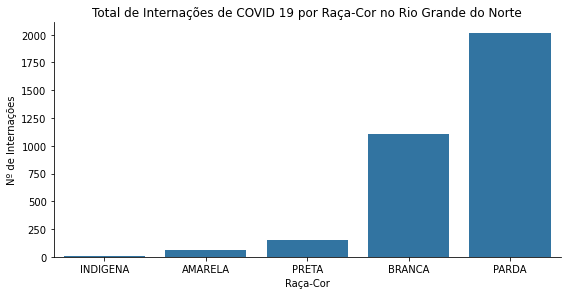

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



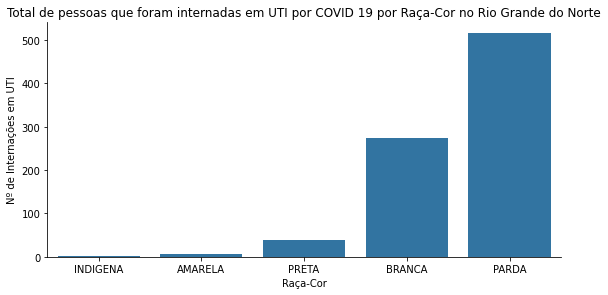

In [ ]:
# Separar dados por raça-cor
table_raca_cor = data_epid_analises.pivot_table(index=["RACA_COR"], values = ["FOI_INTERNADO"], aggfunc=np.sum)
table_raca_cor = table_raca_cor.reset_index()

# Filtragem
table_raca_cor = table_raca_cor.sort_values("FOI_INTERNADO")
table_raca_cor = table_raca_cor[table_raca_cor['RACA_COR']!= 'NAO INFORMADO']

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_cor, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "FOI_INTERNADO")

# Definindo titulos e legendas
plt.title("Total de Internações de COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.ylabel("Nº de Internações")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

# Separar dados por raça-cor
table_raca_cor = data_epid_analises.pivot_table(index=["RACA_COR"], values = ["FOI_UTI"], aggfunc=np.sum)
table_raca_cor = table_raca_cor.reset_index()

# Filtragem
table_raca_cor = table_raca_cor.sort_values("FOI_UTI")
table_raca_cor = table_raca_cor[table_raca_cor['RACA_COR']!= 'NAO INFORMADO']

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_cor, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "FOI_UTI")

# Definindo titulos e legendas
plt.title("Total de pessoas que foram internadas em UTI por COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.ylabel("Nº de Internações em UTI")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

Raça e Antiviral

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



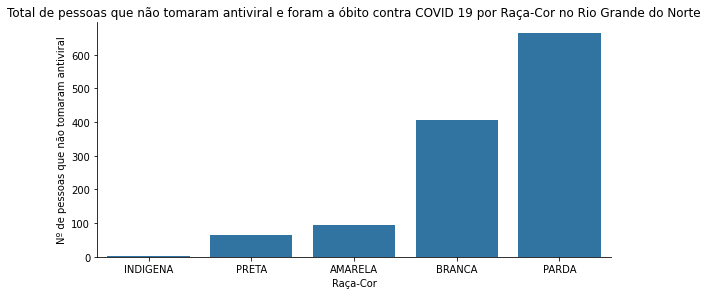

In [ ]:
# Separar dados por raça-cor
table_raca_cor = data_epid_analises.pivot_table(index=["RACA_COR",'OBITO_POSITIVO'], values = ["FOI_ANTIVIRAL"], aggfunc=np.sum)
table_raca_cor = table_raca_cor.reset_index()

# Filtragem
table_raca_cor = table_raca_cor.sort_values("FOI_ANTIVIRAL")
table_raca_cor = table_raca_cor[table_raca_cor['RACA_COR']!= 'NAO INFORMADO']
table_raca_cor = table_raca_cor[table_raca_cor['OBITO_POSITIVO']==True]

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_cor, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "FOI_ANTIVIRAL")

# Definindo titulos e legendas
plt.title("Total de pessoas que não tomaram antiviral e foram a óbito contra COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.ylabel("Nº de pessoas que não tomaram antiviral")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

Raça e Sintomas

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



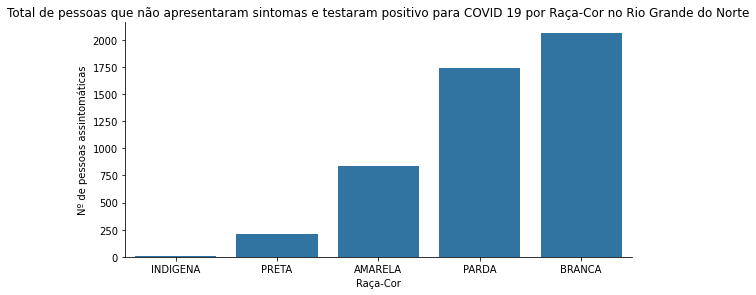

In [ ]:
# Separar dados por raça-cor
table_raca_cor = data_epid_analises.pivot_table(index=["RACA_COR", 'RESULTADO_POSITIVO'], values = ["FOI_ASSINTOMATICO"], aggfunc=np.sum)
table_raca_cor = table_raca_cor.reset_index()

# Filtragem
table_raca_cor = table_raca_cor.sort_values("FOI_ASSINTOMATICO")
table_raca_cor = table_raca_cor[table_raca_cor['RACA_COR']!= 'NAO INFORMADO']
table_raca_cor = table_raca_cor[table_raca_cor['RESULTADO_POSITIVO']==True]

# Criar e exibir gráfico
raca_cor_positivo = sns.FacetGrid(table_raca_cor, height=4, aspect=2)
raca_cor_positivo.map(sns.barplot, "RACA_COR", "FOI_ASSINTOMATICO")

# Definindo titulos e legendas
plt.title("Total de pessoas que não apresentaram sintomas e testaram positivo para COVID 19 por Raça-Cor no Rio Grande do Norte")
plt.ylabel("Nº de pessoas assintomáticas")
plt.xlabel("Raça-Cor")
plt.show(raca_cor_positivo)

### Profissão

fonte: http://www.mtecbo.gov.br/cbosite/pages/downloads.jsf

In [ ]:
# Normalizando os códigos das profissões
data_profissao = data_epid_analises['CBO'].str.split('-', n = 1, expand = True)
data_profissao = data_profissao[0].str.split(' ', n = 1, expand = True)
data_epid_analises['CODIGO'] = data_profissao[0]

In [ ]:
# Importando nomes da profissões
cbo_file = folder + 'CBO.csv'
data_cbo = pd.read_csv(cbo_file,encoding='windows-1254', sep=';', engine='python')
data_cbo['CODIGO'] = data_cbo['CODIGO'].astype(str)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



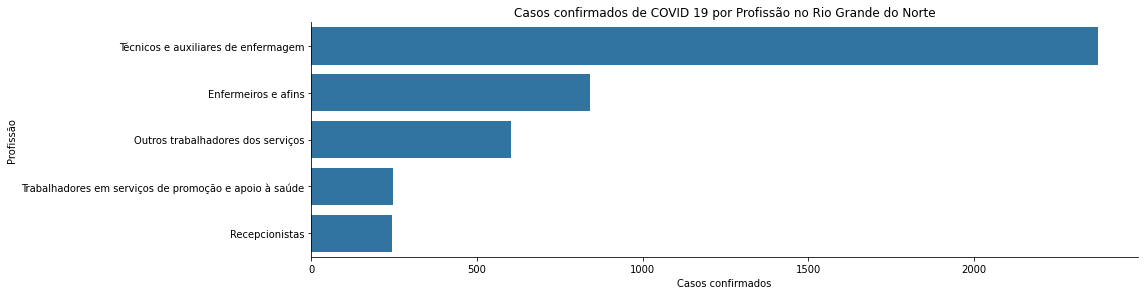

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



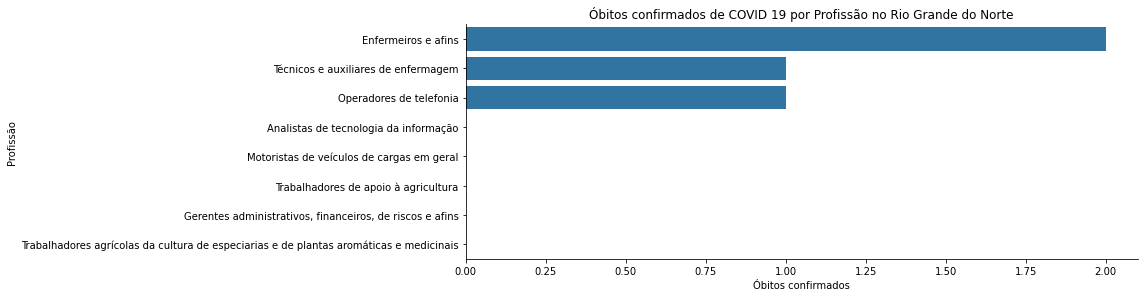

In [ ]:
# Separar dados por municipio e data dos sintomas
table_cbo = data_epid_analises.pivot_table(index=['CODIGO'], values = ['RESULTADO_POSITIVO'], aggfunc=np.sum)
table_cbo = table_cbo.sort_values("RESULTADO_POSITIVO",ascending=False)
table_cbo = table_cbo.reset_index()
table_cbo['CODIGO'] = table_cbo['CODIGO'].astype(str)

# Unir tabela com dados do IBGE
table_cbo_nome = table_cbo.set_index('CODIGO').join(data_cbo.set_index('CODIGO'))
table_cbo_nome = table_cbo_nome.reset_index()
table_cbo_nome.dropna(inplace=True)
casos_confirmados_cbo = table_cbo_nome.head(5).copy().reset_index(drop=True)

# Criar e exibir gráfico
cbo_positivo = sns.FacetGrid(table_cbo_nome.head(5), height=4, aspect=4)
cbo_positivo.map(sns.barplot,"RESULTADO_POSITIVO","TITULO")

# Definindo titulos e legendas
plt.title("Casos confirmados de COVID 19 por Profissão no Rio Grande do Norte")
plt.ylabel("Profissão")
plt.xlabel("Casos confirmados")
plt.show(cbo_positivo)

# Separar dados por municipio e data dos sintomas
table_cbo = data_epid_analises.pivot_table(index=['CODIGO'], values = ['OBITO_POSITIVO'], aggfunc=np.sum)
table_cbo = table_cbo.sort_values("OBITO_POSITIVO",ascending=False)
table_cbo = table_cbo.reset_index()
table_cbo['CODIGO'] = table_cbo['CODIGO'].astype(str)

# Unir tabela com dados do IBGE
table_cbo_nome = table_cbo.set_index('CODIGO').join(data_cbo.set_index('CODIGO'))
table_cbo_nome = table_cbo_nome.reset_index()
table_cbo_nome.dropna(inplace=True)
obitos_confirmados_cbo = table_cbo_nome.head(5).copy().reset_index(drop=True)

# Criar e exibir gráfico
cbo_positivo = sns.FacetGrid(table_cbo_nome.head(8), height=4, aspect=4)
cbo_positivo.map(sns.barplot,"OBITO_POSITIVO","TITULO")

# Definindo titulos e legendas
plt.title("Óbitos confirmados de COVID 19 por Profissão no Rio Grande do Norte")
plt.ylabel("Profissão")
plt.xlabel("Óbitos confirmados")
plt.show(cbo_positivo)

Profissão e Raça

In [ ]:
# Isolando apenas os dados relacionados às profissões com a maior quantidade de casos confirmados
columns = ['CODIGO', 'TITULO', 'RESULTADO_TESTE', 'RACA_COR']
profissao_raca_casos = data_epid_analises.merge(casos_confirmados_cbo, on='CODIGO', how='inner')[columns]
profissao_raca_casos['RESULTADO_POSITIVO'] = profissao_raca_casos['RESULTADO_TESTE'].str.contains('POSITIVO', na = False)
profissao_raca_casos.drop('RESULTADO_TESTE', axis=1, inplace=True)

In [ ]:
# Isolando apenas os dados relacionados às profissões com a maior quantidade de óbitos confirmados
columns = ['CODIGO', 'TITULO', 'OBITO', 'RACA_COR']
profissao_raca_obitos = data_epid_analises.merge(obitos_confirmados_cbo, on='CODIGO',how='inner')[columns]
profissao_raca_obitos['OBITO_POSITIVO'] = profissao_raca_obitos['OBITO'].str.contains('OBITO', na = False)
profissao_raca_obitos.drop('OBITO', axis=1, inplace=True)

In [ ]:
# Separar dados por profissão e raça-cor
table_profissao_raca = profissao_raca_casos.pivot_table(index=["TITULO","RACA_COR"], values = ["RESULTADO_POSITIVO"], aggfunc=np.sum)
table_profissao_raca = table_profissao_raca.reset_index()

# Filtragem
table_profissao_raca = table_profissao_raca[table_profissao_raca['RACA_COR']!= 'NAO INFORMADO']

# Criar e exibir gráfico
fig = px.bar(table_profissao_raca, x="TITULO", y="RESULTADO_POSITIVO", color="RACA_COR",
             title="Casos confirmados de COVID-19 por raça-cor, para cada profissão, no Rio Grande do Norte",
             labels=dict(TITULO="Profissão", RESULTADO_POSITIVO="Casos Confirmados"))
fig.show()